In [1]:
import matplotlib.pyplot as plt
from PIL import Image
import torchvision.transforms as transforms
import torchvision
import torch

In [2]:
import sys
sys.path.append('/root/CS570-Final-Project/src/cropping')

import sys
from crop import Cropper
from classify_crop import ImageClassifier

In [3]:
# Load the image
image_path = '/root/dataset/val/ILSVRC2012_val_00000008.JPEG'
image = Image.open(image_path)

In [4]:
# Random cropping
random_cropper = Cropper(method='random', num_crops=5)
random_cropped_images = random_cropper.crop(image)

# RPN cropping
rpn_cropper = Cropper(method='rpn', resize_rpn_output=False)
rpn_cropped_images = rpn_cropper.crop(image)

/root/anaconda3/envs/cs570_t23/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/root/anaconda3/envs/cs570_t23/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_MobileNet_V3_Large_320_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_MobileNet_V3_Large_320_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fasterrcnn_mobilenet_v3_large_320_fpn-907ea3f9.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_mobilenet_v3_large_320_fpn-907ea3f9.pth
100%|██████████| 74.2M/74.2M [00:16<00:00, 4.70MB/s]


In [5]:
# Instantiate the classifier
classifier = ImageClassifier()

# Classify the cropped images
predictions_random = classifier.classify(random_cropped_images)
predictions_rpn = classifier.classify(rpn_cropped_images)


# Print the predictions
for i, pi in enumerate(predictions_random):
    print(f"Image {i+1}: Class {pi}")

print('===================================')

for j, pj in enumerate(predictions_rpn):
    print(f"Image {j+1}: Class {pj}")

Image 1: Class 415
Image 2: Class 767
Image 3: Class 934
Image 4: Class 928
Image 5: Class 767
Image 1: Class 902
Image 2: Class 928
Image 3: Class 928
Image 4: Class 928
Image 5: Class 928
Image 6: Class 951
Image 7: Class 928
Image 8: Class 929
Image 9: Class 928
Image 10: Class 122
Image 11: Class 767
Image 12: Class 994
Image 13: Class 928


In [6]:
# Define number of subplots
num_subplots = max(len(random_cropped_images), len(rpn_cropped_images)) + 1

(-0.5, 499.5, 374.5, -0.5)

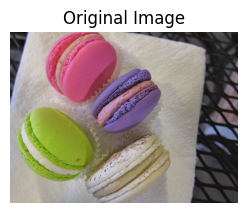

In [7]:
# Display the original image
plt.figure(figsize=(10, 10))
plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(image)
plt.axis('off')

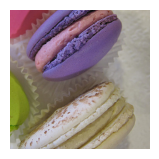

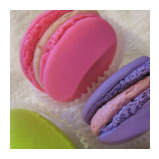

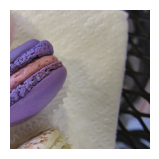

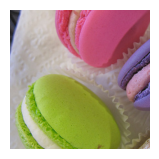

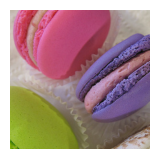

In [8]:
# Display the random cropped images
for i, img in enumerate(random_cropped_images, 2):
    plt.figure(figsize=(30, 30))
    plt.subplot(num_subplots, 3, i)
    plt.imshow(transforms.ToPILImage()(img))
    plt.axis('off')

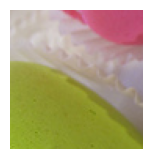

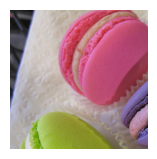

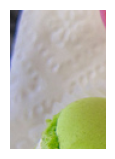

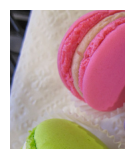

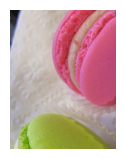

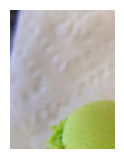

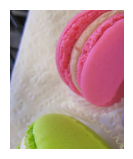

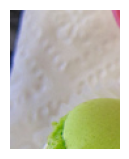

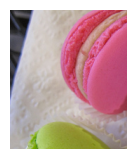

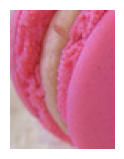

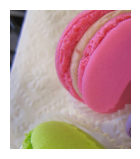

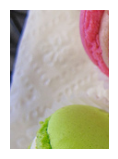

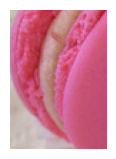

In [9]:
# Display the RPN cropped images
for i, img in enumerate(rpn_cropped_images, 2):
    plt.figure(figsize=(30, 30))
    plt.subplot(num_subplots, 3, num_subplots + i)
    plt.imshow(transforms.ToPILImage()(img))
    plt.axis('off')